# About the Dataset

### World Happiness Report Data for 2017 from their website:

The first World Happiness Report was published in April, 2012, in support of the UN High Level Meeting on happiness and well-being. Since then the world has come a long way. Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy. In June 2016 the OECD committed itself “to redefine the growth narrative to put people’s well-being at the center of governments’ efforts”. In February 2017, the United Arab Emirates held a full-day World Happiness meeting, as part of the World Government Summit. Now on World Happiness Day, March 20th, we launch the World Happiness Report 2017, once again back at the United Nations, again published by the Sustainable Development Solutions Network, and now supported by a generous three-year grant from the Ernesto Illy Foundation. Some highlights are as follows.

Source: Helliwell, J., Layard, R., & Sachs, J. (2017). World Happiness Report 2017, New York: Sustainable Development Solutions Network.

##### Dictionary:

![Dictionary](img/DictionaryData.png)

##### Labeled Visualized Happiness Data Comparison of various countries on varous factors:

![data1-image](img/Data1_Happiness.png)


![data2-image](img/Data2_Happiness.png)


![data3-image](img/Data3_Happiness.png)





### Review of Regression and Correlation [ To be Completed ]

What is Linear Regression?

Why use Linear Regression?

What is Correlation?

Explain Regression with formulas
    Cost function
    Gradient descent step
    Optimal Coefficients
    Predicting the value
    Accuracy Score
    Plotting

Explain Correlation with formula and graphs

    Correlation Formula
    Correlation Coeff
    Correlation Values and meaning of a positive or negative correlation
    Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.



# Explaination of the Code






### Import important libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy as sp

### Read the dataset

In [2]:
# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()

In [3]:
data1.head() 


,index,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,8,Afghanistan,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,NaN,NaN,1.796219,0.425627
1,17,Albania,Albania,2016,4.511101,9.282300,0.638411,68.698380,0.729819,-0.017927,0.901071,0.675244,0.321706,0.400910,NaN,NaN,2.646668,0.586701
2,22,Algeria,Algeria,2016,5.388171,9.549138,0.748150,64.829948,NaN,NaN,NaN,0.668838,0.371372,NaN,NaN,NaN,2.109472,0.391501
3,37,Argentina,Argentina,2016,6.427221,NaN,0.882819,67.443993,0.847702,NaN,0.850924,0.841907,0.311646,0.419562,NaN,NaN,2.127109,0.330953
4,48,Armenia,Armenia,2016,4.325472,8.989569,0.709218,65.409470,0.610987,-0.155814,0.921421,0.593600,0.437228,0.184713,NaN,NaN,2.126364,0.491591


### Preprocessing the Data

In [4]:
data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1).values
# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)


### Split data into training and test set


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.15)
# ?train_test_split

### Fit Linear Regression Model and Predict

In [25]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score as cvs

def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)  
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred) 
alg=LR()
alg.fit(xtrain,ytrain)

print('Intercept: ',alg.intercept_)
print("Coefficients : ",alg.coef_)
ypred=alg.predict(xtest)
print('Accuracy of prediction on training set is : ',AccuracyScore(ytrain,alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ',AccuracyScore(ytest,ypred))


Intercept:  -3.5563749457323084
Coefficients :  [ 0.34679864  2.33032968  0.02969531  1.45461887  0.70110507 -0.1915203
  1.49684014  0.32331512 -0.25678802]
Accuracy of prediction on training set is :  0.8009600322160861
Accuracy of prediction on test set is :  0.7978541207620589


## Predicting Delhi's Happiness Score and Rank in the World

Predictions are based on data collected from over 250 students all across Delh.


##### Evaluation metrics for SDP of Delhi

SDP per capita- 2016 = 333468 Lakhs Delhi

Currency rate average in 2016 = 69.956

SDP per capita in dollars= 4766.824861341414
##### ---------------------------------------------------------------
Log of sdp per capita 5.6782291956 

Social Support = 0.84426230

Life expectancy = 73.2

Freedom to make life choices = 0.7500000

Generocity=0.29098361

Perception towards corruption(government)= 0.89344262

positive affect= 1.45901639

negative effect= 1.14754098

Confidence in national government=0.44262295

In [7]:
delhiData=[[5.6782,0.84426230,73.2,0.7500000,0.29098361, 0.89344262, 0.48633880, 0.38251366, 0.44262295] ]
delhiHappinessScore=alg.predict(delhiData)[0]
print('Delhi\'s Happiness Score is : ',delhiHappinessScore)
data.sort_values(['Life Ladder'],ascending=False,inplace=True)
delhiRank=1
for i in data[data.year==2016]['Life Ladder']:
    if(delhiHappinessScore<=i):
        delhiRank+=1
    else:
        break
print('Delhi\'s Rank from Computed Machine Learning Model is :',delhiRank)

Delhi's Happiness Score is :  4.415768708285203
Delhi's Rank from Computed Machine Learning Model is : 112


# Data Visualization and Inferences

In [8]:

#Formula used internally
# xy=x*y
# xsquare=x**2
# ysquare=y**2
# sumXY=xy.sum()
# sumXSquare=xsquare.sum()
# sumYSquare=ysquare.sum()
# N=len(x)

# import math
# denominator=math.sqrt((N*sumXSquare-x.sum()*x.sum())*(N*sumYSquare-y.sum()*y.sum()))
# numerator=(N*sumXY-(sumXSquare)*(sumYSquare))
# r=numerator/denominator

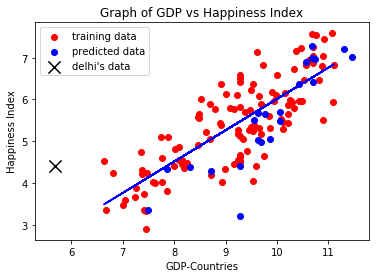

Correlation between data is :  0.778381775249043
The Delhi's data lying so left is because of size of Delhi and SDP of Delhi are quiet low compared to "GDP of countries".


In [29]:
plt.scatter(xtrain[:,0],ytrain,color="red", label="training data")
plt.scatter(xtest[:,0],ypred,color="blue" ,label="predicted data")
plt.scatter(delhiData[0][0],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Graph of GDP vs Happiness Index")
plt.legend(loc='upper left')
plt.show()

# Metrics for judging the result, calculating correlation
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print('The Delhi\'s data lying so left is because of size of Delhi and SDP of Delhi are quiet low compared to "GDP of countries".')


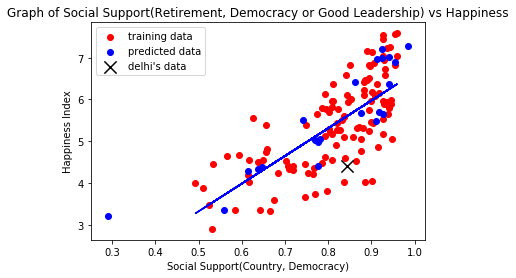

Correlation between data is :  0.8147749781872496


In [10]:
plt.scatter(xtrain[:,1],ytrain,color="red", label="training data")
plt.scatter(xtest[:,1],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][1],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,1]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])



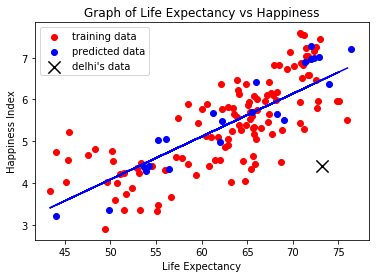

Correlation between data is :  0.8618155223224154


In [11]:
plt.scatter(xtrain[:,2],ytrain,color="red", label="training data")
plt.scatter(xtest[:,2],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][2],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,2].reshape(-1,1),ytrain)
plt.plot(xtrain[:,2],alg_pred.predict(xtrain[:,2].reshape(-1,1)),color="blue")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Index")
plt.title("Graph of Life Expectancy vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,2]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])


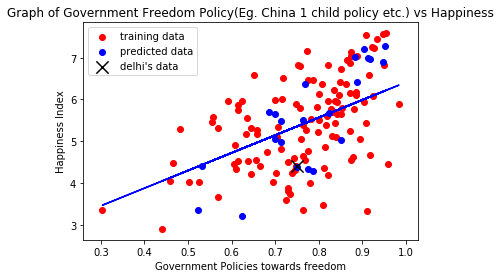

Correlation between data is :  0.6757385932479737


In [12]:
plt.scatter(xtrain[:,3],ytrain,color="red", label="training data")
plt.scatter(xtest[:,3],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][3],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,3].reshape(-1,1),ytrain)
plt.plot(xtrain[:,3],alg_pred.predict(xtrain[:,3].reshape(-1,1)),color="blue")
plt.xlabel("Government Policies towards freedom")
plt.ylabel("Happiness Index")
plt.title("Graph of Government Freedom Policy(Eg. China 1 child policy etc.) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,3]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
# print("Conclusion: Happy people may or maynot be donating :(- World bank")


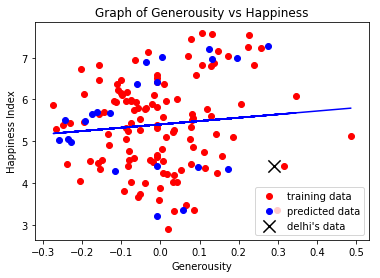

Correlation between data is :  0.2695350264651132
Conclusion: Happy people may or maynot be donating :(- World bank


In [13]:
plt.scatter(xtrain[:,4],ytrain,color="red", label="training data")
plt.scatter(xtest[:,4],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][4],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

# plt.scatter(xtest[:,0],ytest,color="black")
alg_pred=LR()
alg_pred.fit(xtrain[:,4].reshape(-1,1),ytrain)
plt.plot(xtrain[:,4],alg_pred.predict(xtrain[:,4].reshape(-1,1)),color="blue") 
plt.xlabel("Generousity")
plt.ylabel("Happiness Index")
plt.title("Graph of Generousity vs Happiness")
plt.legend(loc='lower right')

plt.show()
x=xtest[:,4]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print("Conclusion: Happy people may or maynot be donating :(- World bank")


In [14]:
data1.head(1)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.32499,NaN,NaN,1.796219,0.425627


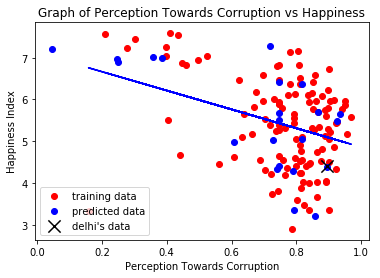

Correlation between data is :  -0.7783817752490428
Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets
Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative


In [15]:
plt.scatter(xtrain[:,5],ytrain,color="red", label="training data")
plt.scatter(xtest[:,5],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][5],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,5].reshape(-1,1),ytrain)
plt.plot(xtrain[:,5],alg_pred.predict(xtrain[:,5].reshape(-1,1)),color="blue")
plt.xlabel("Perception Towards Corruption")
plt.ylabel("Happiness Index")
plt.title("Graph of Perception Towards Corruption vs Happiness")
plt.legend(loc='lower left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print("Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets")
print("Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative")


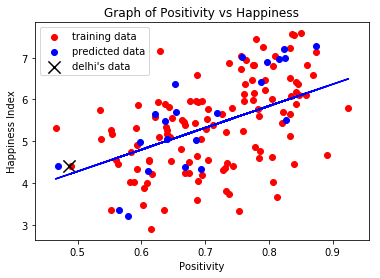

Correlation between data is :  0.7783817752490431


In [16]:
plt.scatter(xtrain[:,6],ytrain,color="red", label="training data")
plt.scatter(xtest[:,6],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][6],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,6].reshape(-1,1),ytrain)
plt.plot(xtrain[:,6],alg_pred.predict(xtrain[:,6].reshape(-1,1)),color="blue")
plt.xlabel("Positivity")
plt.ylabel("Happiness Index")
plt.title("Graph of Positivity vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])



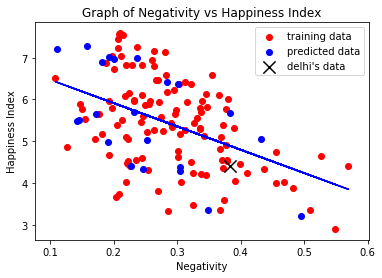

Correlation between data is :  -0.7783817752490426


In [17]:
plt.scatter(xtrain[:,7],ytrain,color="red", label="training data")
plt.scatter(xtest[:,7],ypred,color="blue", label="predicted data")
plt.scatter(delhiData[0][7],delhiHappinessScore,color="black",label="delhi's data",marker="x",s=150, linewidths=10,edgecolors="green")

alg_pred=LR()
alg_pred.fit(xtrain[:,7].reshape(-1,1),ytrain)
plt.plot(xtrain[:,7],alg_pred.predict(xtrain[:,7].reshape(-1,1)),color="blue")
plt.xlabel("Negativity")
plt.ylabel("Happiness Index")
plt.title("Graph of Negativity vs Happiness Index")
plt.legend(loc='upper right')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
